In [2]:
!pip install torch-geometric
!pip install torch-scatter==latest+cu101 torch-sparse==latest+cu101 -f https://s3.eu-central-1.amazonaws.com/pytorch-geometric.com/whl/torch-1.4.0.html

     |████████████████████████████████| 143kB 3.0MB/s 
     |████████████████████████████████| 348kB 59.9MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-1.4.1-cp36-none-any.whl size=222272 sha256=69f162d0972b1ecf4ec0cfe9b3279d3631b9aa060cec7024c0cf33895e6dc2c5
  Stored in directory: /root/.cache/pip/wheels/5c/c8/4f/d25495ab2fa4422881f41048e27d0feb58a86e06d19794c63f
  Created wheel for plyfile: filename=plyfile-0.7.1-cp36-none-any.whl size=32828 sha256=b288cfef38a8305d0dfb6bab93632b118c7a0997250ddb3d5c59888dfa1226f0
  Stored in directory: /root/.cache/pip/wheels/d6/0d/bf/6d603d81b98604d2ecfd5e99d4ab7c9af664fd5285ab82bbb0
Successfully built torch-geometric plyfile
Looking in links: https://s3.eu-central-1.amazonaws.com/pytorch-geometric.com/whl/torch-1.4.0.html
     |████████████████████████████████| 10.6MB 349kB/s 
     |████████████████████████████████| 9.6MB 93.2MB/s 


In [4]:
!pip install --upgrade torch-sparse
!pip install --upgrade torch-cluster

Requirement already up-to-date: torch-sparse in /usr/local/lib/python3.6/dist-packages (0.5.1)
  Created wheel for torch-cluster: filename=torch_cluster-1.4.5-cp36-cp36m-linux_x86_64.whl size=20350311 sha256=07f28e626cdd2118f73d2d84a24002c229b1f35d91bf8911a3260c95e02d8dcc
  Stored in directory: /root/.cache/pip/wheels/0a/26/7e/a6d6a80eae5ca39b92bc77773f36cf433d5085de18014382b1
Successfully built torch-cluster


In [0]:
import torch_geometric

In [0]:
from torch_geometric.data import Data

In [0]:
import torch


In [0]:
edge_index=torch.tensor([[0,1,1,2],[1,0,2,1]],dtype=torch.long)

In [0]:
x=torch.tensor([-1,0,1],dtype=torch.float).view(-1,1)

In [0]:
data=Data(x=x,edge_index=edge_index)

In [13]:
data.is_directed()

False

In [14]:
data.is_undirected()

True

In [16]:
data.num_edge_features

0

In [17]:
data.keys

['x', 'edge_index']

In [18]:
data.num_nodes

3

In [0]:
from torch_geometric.datasets import TUDataset

In [31]:
dataset=TUDataset(root="dataset/",name="ENZYMES")

Extracting dataset/ENZYMES/ENZYMES.zip
Processing...
Done!


In [32]:
len(dataset)

600

In [33]:
dataset.num_classes

6

In [34]:
dataset.num_edge_attributes

0

In [35]:
dataset.num_features

3

In [36]:
dataset.num_node_labels

3

In [0]:
data=dataset[0]

In [38]:
data

Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [39]:
data.edge_index

tensor([[ 0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
          3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12,
         12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16,
         16, 16, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 20, 20,
         21, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25,
         25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28,
         28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 32,
         32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35,
         35, 35, 36, 36, 36, 36],
        [ 1,  2,  3,  0,  2,  3, 24, 27,  0,  1,  3, 27, 28,  0,  1,  2,  4,  5,
         28,  3,  5,  6, 29,  3,  4,  6,  7, 29,  4,  5,  7,  8,  5,  6,  8,  9,
         10,  6,  7,  9,  7,  8, 10, 11, 12,  7,  9, 11, 12,  9, 10, 12, 26

In [40]:
data.is_undirected()

True

In [41]:
data.is_directed()

False

In [0]:
traindataset=dataset[:540]

In [0]:
testdataset=dataset[540:]

In [0]:
shuffledtrain=torch.randperm(len(traindataset))

In [0]:
traind=traindataset[shuffledtrain]

In [0]:
from torch_geometric.nn import GCNConv

In [0]:
import torch


In [0]:
import torch.nn.functional as f

In [0]:
class net(torch.nn.Module):
  def __init__(self,):
    super().__init__()
    self.conv1=GCNConv(dataset.num_node_features,16)
    self.conv2=GCNConv(16,dataset.num_classes)

  def forward(self,data):
    x,edge_index=data.x,data.edge_index
    x=self.conv1(x,edge_index)
    x=f.relu(x)
    x=f.dropout(x,training=self.training)
    x=self.conv2(x,edge_index)
    return f.log_softmax(x,dim=1)

In [0]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [0]:
model=net().to(device)

In [0]:
from torch_geometric.datasets import Planetoid


In [58]:
dataset=Planetoid(root="haha",name="Cora")

Processing...
Done!


In [59]:
dataset.num_features

1433

In [60]:
len(dataset)

1

In [61]:
dataset.num_node_features

1433

In [62]:
dataset.num_edge_features

0

In [0]:
data=dataset[0].to(device)

In [64]:
data

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

In [0]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.01,weight_decay=5e-4) # weight decay is for l2 regularization 

In [86]:
model.train()

net(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)

In [0]:
initializedweights=model.state_dict()

In [74]:
initializedweights['conv1.weight'].shape

torch.Size([1433, 16])

In [78]:
data.train_mask.shape

torch.Size([2708])

In [87]:
trainloss=[]
for e in range(200):
  optimizer.zero_grad()
  out=model.forward(data)
  #print(out.shape)
  loss=f.nll_loss(out[data.train_mask],data.y[data.train_mask])
  loss.backward()
  optimizer.step()
  trainloss.append(loss.item())
  if e%10==0:
    print(loss.item()) 

1.9429022073745728
0.7279822826385498
0.23085400462150574
0.09764629602432251
0.044556647539138794
0.04660327360033989
0.041792094707489014
0.029315447434782982
0.04729722812771797
0.044066522270441055
0.03285852074623108
0.02733093872666359
0.04987211152911186
0.03209586814045906
0.027188215404748917
0.030589260160923004
0.02188265509903431
0.02737232856452465
0.03907081484794617
0.028882725164294243


In [0]:
import matplotlib.pyplot as plt

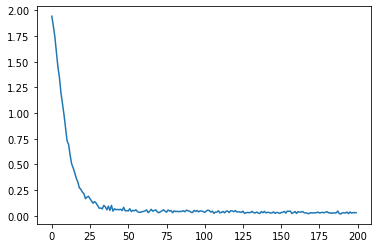

In [89]:
plt.plot(trainloss,)

In [0]:
out=model.forward(data)

In [0]:
testpred=out[data.test_mask]

In [0]:
testpred=testpred.argmax(-1)

In [0]:
actualtestpred=data.y[data.test_mask]


In [97]:
actualtestpred

tensor([3, 4, 4,  ..., 3, 3, 3], device='cuda:0')

In [0]:
from sklearn.metrics import accuracy_score,roc_auc_score,auc,f1_score

In [105]:
accuracy_score(testpred.cpu().numpy(),actualtestpred.cpu().numpy())

0.742

In [110]:
f1_score(testpred.cpu().numpy(),actualtestpred.cpu().numpy(),average='macro')

0.7358845418619219